In [1]:
import pandas as pd # to work with dataframes, manipulate data (panel data)
import matplotlib.pyplot as plt # viz library
import seaborn as sns # HD viz library
import numpy as np # to work with numbers (numerical python)


pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv("/Users/davidthrien/Documents/Ironhack/Ironhack_labs/Week2/lab-eda-univariate/amz_uk_price_prediction_dataset.csv")
df = data.copy()

In [69]:
#Part1 1. Frequency Tables
df.head(10)
df.tail(5)
df.sample(10)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
1596988,1798213,B07BP8CY91,"Buses stamps, mint, framed 2001",5.0,2,29.95,False,0,Handmade Home Décor
900987,980267,B076F15KB5,Celtic FC Mens Jacket Hooded Winter Quilted OF...,4.3,58,49.99,False,0,Sports & Outdoors
1082194,1195770,B0993D7J2L,GAOJINXIURZ LED Barbers Pole Barber Shop Pole ...,0.0,0,144.58,False,0,Outdoor Rope Lights
1499636,1674343,B0CGRNP1RG,Duohropke Cardigans for Men 4XL Knitted Cardig...,0.0,0,21.70,False,0,Sports & Outdoors
80474,87483,B07J5TMKZH,Kids Winter Beanie Hat Circle Scarf Set Thick ...,4.6,478,15.88,False,0,Boys
698060,753318,B0CJ69ZBVH,Handguard Hand Shield Guards For CB500X CB500F...,0.0,0,42.40,False,0,"Motorbike Handlebars, Controls & Grips"
125513,135622,B0B9Y8XJZX,Personalised Rainbow Post Box Sign for Christe...,0.0,0,11.00,False,0,Handmade Gifts
1953328,2199591,B07FW2FP31,LEGO Harry Potter Series 1 - Tina Goldstein Mi...,4.6,49,3.99,False,0,Building & Construction Toys
488196,524846,B0C2HCLKRH,Womens Tops Y2K Womens Tops White 80S Running ...,0.0,0,5.50,False,0,Sports & Outdoors
2341525,2698115,B009YW6UO0,Knightsbridge PIR0901S Wall Mounted PIR Sensor...,4.2,28,24.99,False,0,Outdoor Lighting


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [5]:
df.shape

(2443651, 9)

In [6]:
df.eq(" ").sum()


uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [7]:
df.isna().sum()


uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [8]:
df.nunique()

uid                  2443651
asin                 2222742
title                2077591
stars                     42
reviews                19446
price                  82916
isBestSeller               2
boughtInLastMonth         25
category                 296
dtype: int64

In [10]:
cat = df.select_dtypes(exclude="number")
cat

,asin,title,isBestSeller,category
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",False,Hi-Fi Speakers
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",True,Hi-Fi Speakers
2,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",False,Hi-Fi Speakers
3,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",False,Hi-Fi Speakers
4,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,False,Hi-Fi Speakers
...,...,...,...,...
2443646,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",False,Motorbike Clothing
2443647,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,False,Motorbike Clothing
2443648,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,False,Motorbike Clothing
2443649,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,False,Motorbike Clothing


In [21]:
frequency_table = cat["category"].value_counts()
frequency_table_top5 = frequency_table[0:5]
print(frequency_table_top5)
proportion_table = cat["category"].value_counts(normalize=True).round(2)
proportion_table_top5 = proportion_table[0:5]
print(proportion_table_top5)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64
category
Sports & Outdoors                         0.34
Beauty                                    0.01
Handmade Clothing, Shoes & Accessories    0.01
Bath & Body                               0.01
Birthday Gifts                            0.01
Name: proportion, dtype: float64


In [23]:
df2 = pd.concat([frequency_table_top5, proportion_table_top5], axis=1)
df2.columns = ['absolute_frequency', 'relative_frequency']
df2

,absolute_frequency,relative_frequency
category,,
Sports & Outdoors,836265,0.34
Beauty,19312,0.01
"Handmade Clothing, Shoes & Accessories",19229,0.01
Bath & Body,19092,0.01
Birthday Gifts,18978,0.01


In [24]:
total_absolute = frequency_table_top5.sum()
total_relative = proportion_table_top5.sum()

total_row = pd.DataFrame({
    'absolute_frequency': [total_absolute],
    'relative_frequency': [total_relative]
}, index=['Total'])
total_row

,absolute_frequency,relative_frequency
Total,912876,0.38


In [25]:
df3 = pd.concat([df2,total_row], axis=0)
df3

,absolute_frequency,relative_frequency
Sports & Outdoors,836265,0.34
Beauty,19312,0.01
"Handmade Clothing, Shoes & Accessories",19229,0.01
Bath & Body,19092,0.01
Birthday Gifts,18978,0.01
Total,912876,0.38


/var/folders/1m/50y9vknn1lx05wgwhbgqtdh80000gn/T/ipykernel_2701/2905526549.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


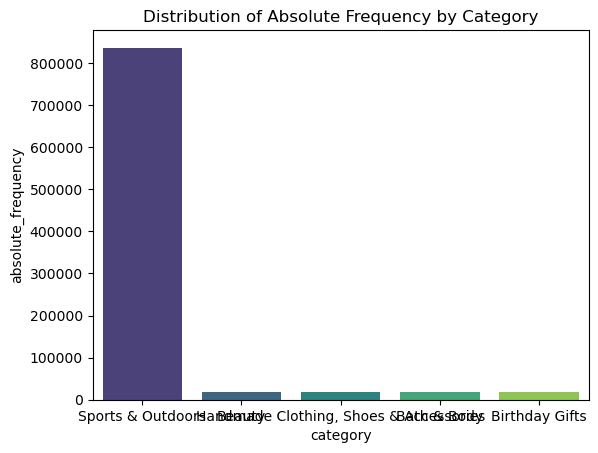

In [78]:
#Part1 2. Visualizations
sns.barplot(
    x='category',
    y='absolute_frequency',
    data=df2,
    palette='viridis',
)
plt.title('Distribution of Absolute Frequency by Category')
plt.show()


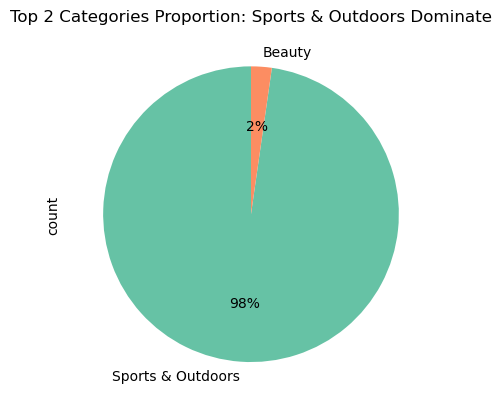

In [79]:
frequency_table_top2 = frequency_table[0:2]
frequency_table_top2.plot.pie(autopct='%1.0f%%' ,startangle=90, colors=sns.color_palette('Set2'))
plt.title('Top 2 Categories Proportion: Sports & Outdoors Dominate')
plt.show()
# Sports & Outdoors dominate the listings by far

In [ ]:
#Part2: 1. Measures of Centrality
print(df["price"].mean().round(2))
print(df["price"].median())
print(df["price"].mode())
#the average price is much higher than the mode




89.24
19.09
0    9.99
Name: price, dtype: float64


In [61]:
#Part2 2.Measures of Dispersion
print(df["price"].var())
print(df["price"].std())
print(df["price"].max()-df["price"].min())


Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

df["price"].skew().round(2)

#the measures of dispersion show that there are significant outliers on the higher side of prices

119445.48532256528
345.60886175352226
100000.0
36.0


27.49

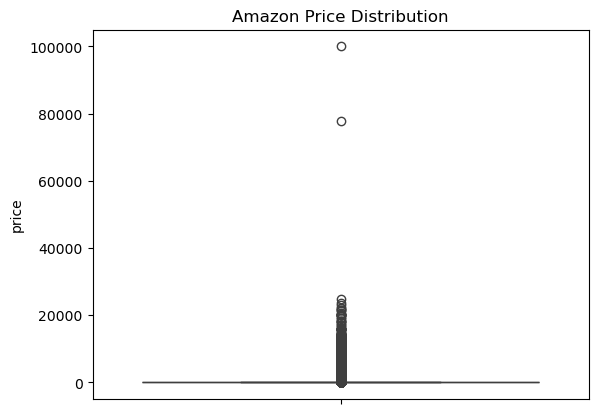

In [80]:
sns.boxplot(data=df.price)
plt.title('Amazon Price Distribution')
plt.show()

In [71]:
#Part3 1.Measure of Centrality
df_review = df[df["reviews"] != 0]

df_review.sample(30)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
1852319,2081185,B0BDSKBBQP,"Hair Curling Wand 25mm, Ceramic Curling Tongs ...",4.3,178,24.99,False,400,Beauty
2188038,2533808,B09YY74T2H,"Happy Birthday Banner, Black Gold silver Party...",4.4,1179,5.99,False,500,Arts & Crafts
1904385,2135955,B0073T8NJQ,"TFA Dostmann T/H Display Transmitter, Multi-Co...",4.4,113,27.47,False,0,Garden Storage & Housing
2237793,2585374,B07HQNJ7FK,"USCAMEL Binoculars Bird Watching,10x42 Compact...",4.6,358,48.99,False,0,"Binoculars, Telescopes & Optics"
1761720,1983579,B0CF5CR51X,Ear Plugs for Sleeping DONGSHEN Reusable Earpl...,4.4,6,9.99,False,200,Luggage and travel gear
1692077,1905690,B09Q8JM815,amFilm [2+2 Pack Screen Protector for Samsung ...,4.4,3269,6.79,False,0,Mobile Phones & Communication
2290957,2643950,B07BB63T59,Gps Navigation Red Hard Carry Case For Garmin ...,4.7,3,8.99,False,0,"GPS, Finders & Accessories"
1328899,1466982,B08VD5D4QC,5 Pieces Friendship Wooden Hanging Heart Plaqu...,4.5,241,5.99,False,0,Signs & Plaques
210433,224857,B0010P66Z2,Nylabone Dura Chew Extreme Tough Dog Chew Toy ...,4.5,9225,6.10,False,400,Pet Supplies
1893135,2124476,B0BK9KLPDT,"ciciglow Portable WiFi Hotspot, 4G Mobile WiFi...",3.7,5,22.01,False,0,Networking Devices


In [ ]:
print(df_review["stars"].mean().round(2))
print(df_review["stars"].median())
print(df_review["stars"].mode())
#customers ususally rate products quite positiv

4.32
4.4
0    4.5
Name: stars, dtype: float64


In [ ]:
#Part3 2.Measures of Dispersion
print(df_review["stars"].var())
print(df_review["stars"].std())
print(df_review["stars"].max()-df_review["stars"].min())


Q1 = df_review["stars"].quantile(0.25)
Q3 = df_review["stars"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

# while the range is big, the standard deviation and iqr is narrow

0.3083433752380519
0.5552867504614637
4.0
0.5


In [ ]:
print(df_review["stars"].skew().round(2))
df_review["stars"].kurtosis().round(2)

# The positibe kurtosis tells us that the distribution has a higer peak und fatter tails. 
# While the negative skew confirms that we have a concentration in higher ratings, it also shows the outliers on the lower side. 

-2.38


9.78

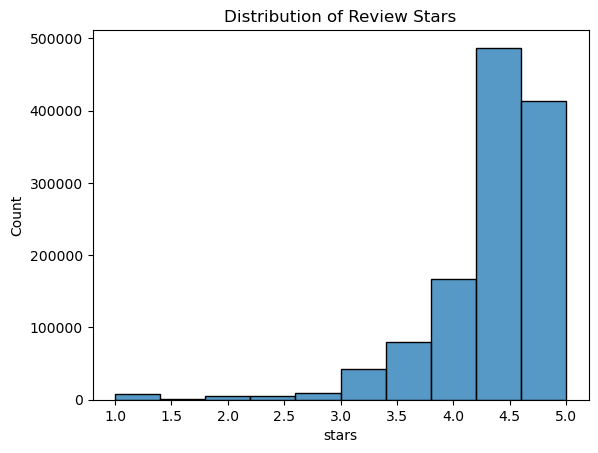

In [ ]:
sns.histplot(df_review.stars, bins=10)
plt.title('Distribution of Review Stars')
plt.show()
#ratings around 4.5 are most dominant

Most important findings
-Products in the category Sports & Outdoors dominate the listings by far
-While there most products are in the low price segment, there are few significant outliers in the high price segment
-Most product rating are positiv and show 4-5 stars
